## Решающие деревья - введение
### Как выглядит дерево и из чего оно состоит

Предикат - это значение, 
Внутренняя вершина, или по другому, ветвление

Дуга - или значение предиката (предикат True - идем вправо, False - идем влево)

Лист - записанное предсказание метки класса или вещественного значения

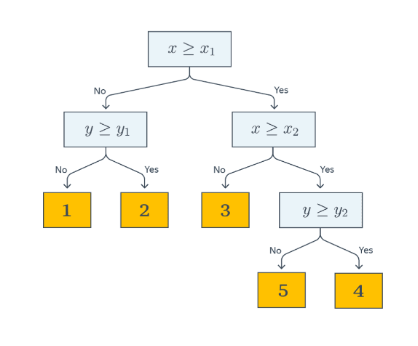

In [2]:
Image(filename = "pics/решающ дерево.png", width=400, height=500)

Продвинутый пример...

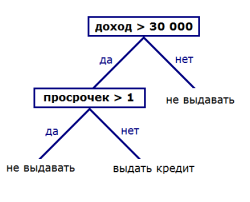

In [143]:
Image(filename = "pics/реш дер дьяк.png", width=300, height=400)

### Как выгдядит предкат

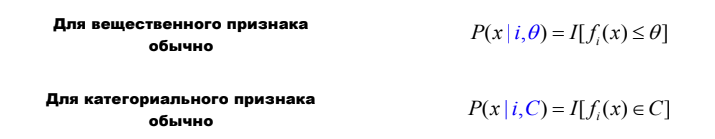

In [147]:
Image(filename = "pics/предикаты.png", width=700, height=700)

### Как происходит построение этого предиката (расчет порога для сплита)?

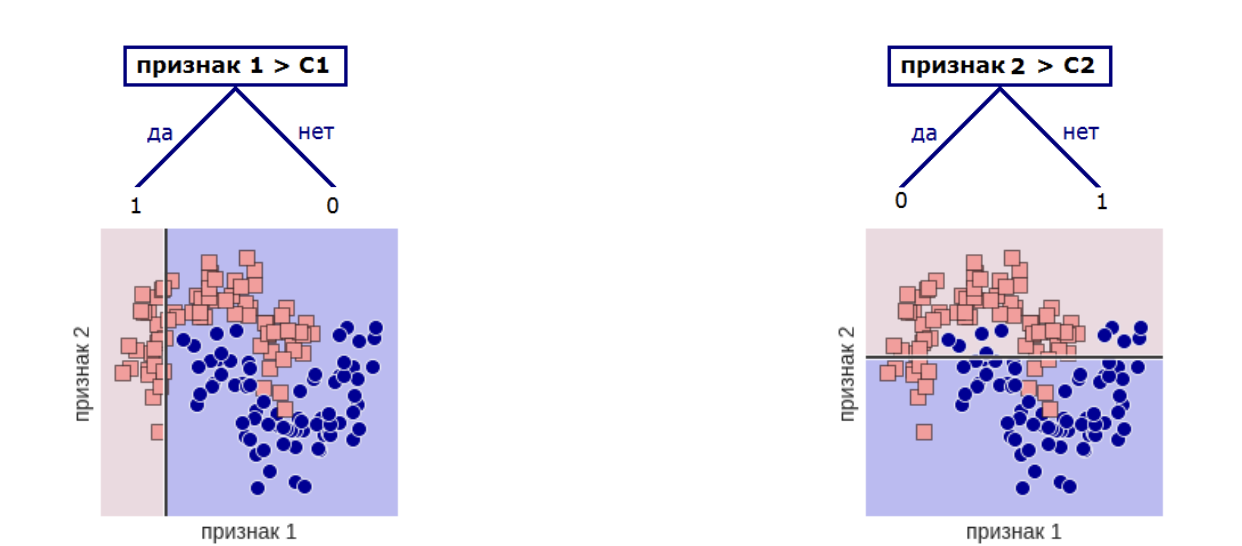

In [149]:
Image(filename = "pics/расщепление на области.png", width=700, height=700)

### Как выбрать порог расщепления?

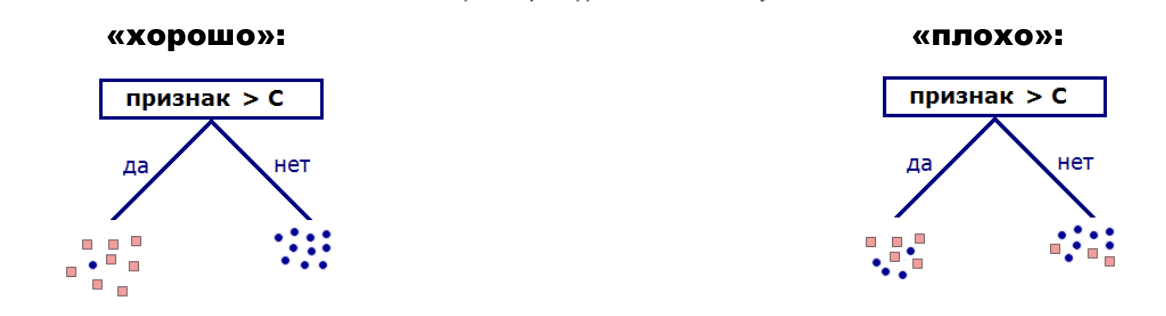

In [150]:
Image(filename = "pics/расщепление1.png", width=700, height=700)

### Решением этой задачи является введение так называемой меры неоднородности, или по другому impurity

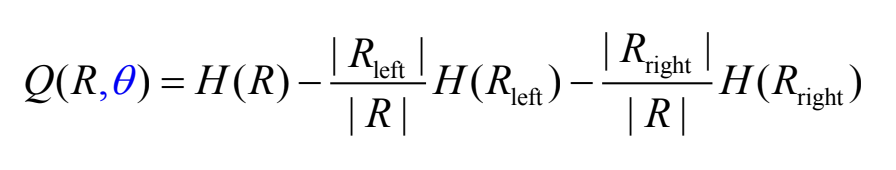

In [139]:
Image(filename = "pics/расчетнеоднородности.png", width=700, height=700)

### Какие бывают формулы расчета ? 

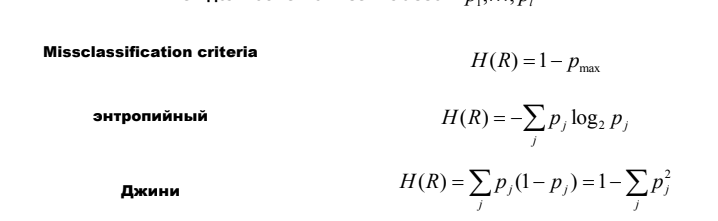

In [7]:
Image(filename = "pics/меры impurity.png", width=700, height=700)

#### Энтропийный критерий можно теоретически обосновать с помощью Information Gain, теорию информации и другими математическими штуками


### Как присвоить метку?

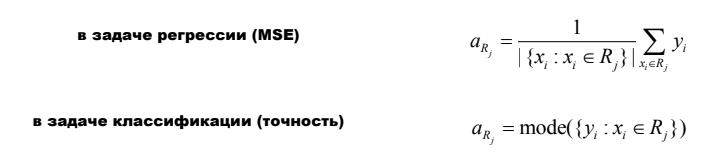

In [151]:
Image(filename = "pics/присваивание меток.png", width=700, height=700)

#### Расщепление в задачах регресии делается по дисперсии

### Проблема переобучения деревьев

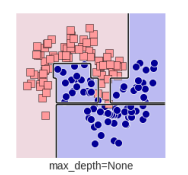

In [10]:
Image(filename = "pics/переобученное дерево.png", width=300, height=300)

## Итог: решающие деревья

##### возможности


##### качество

##### эффективность / стабильность

##### понимание, интерпретация и анализ


## Ансамбли решающих деревьев - случайный лес 


#### Ансамбль в общем виде - это обьединение какого-то кол-ва "базовых" моделей и использование их ответов для построения результата

1. Комитеты (госовование), усреднение
2. Бэгинг
3. Блендинг
4. Стекинг
5. И так далее, их еще довольно много

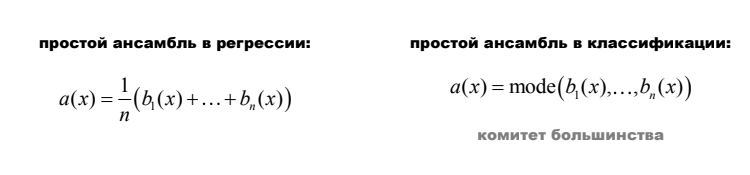

In [4]:
Image(filename = "pics/простые ансамбли.png", width=700, height=700)

#### Как может выглядеть усложнение(улучшение)? 
Путем использования "мета-алгоритма", который также можно тюнить

#### Это можно теоретически обосновать
Примем, что алгоритмы независимые и посмотрим, как будет выглядеть дисперсия и мат ожидание

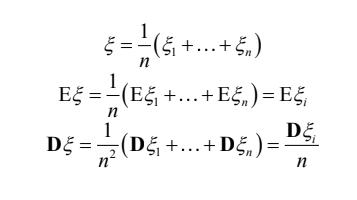

In [6]:
Image(filename = "pics/мат ожидание и дисперсия ансамбля.png", width=400, height=400)

#### Построение случайного леса
1. Строится подвыборка (с повторением)
2. На ней строится обычное решающее дерево, с учетом всех параметов (кол-во фичей, глубина и тд)
3. Пункты 1 и 2 повторяются до достижения n_estimators/критерий остановки и тд и тп
4. Строим ответ

Полезные темы, с коротыми еще можно ознакомится:
1. Измерение качества с помощью OOB - это та часть каждой подвыборки, оставшаяся после ее формирования
2. Рейтинг признаков
3. Другие виды ансамблирования
4. Многоклассовая классификация (1vs1, 1vsall)
5. Бустинг (усиление каждого нового алгоритма через минимизацию ошибки предыдущего)

### Воркшоп - посмотрим на разные бессмысленные данные, но красивые картинки 

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

import warnings
warnings.filterwarnings("ignore")

In [102]:
def plot_surface(model: DecisionTreeClassifier, data):
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02
    feature_names = [0,1]


    # for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
    X = data[:, [0, 1]]
    y = data[:, [2]]

    # Train
    # clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(111)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=feature_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle("Decision surface of decision trees trained on pairs of features")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")

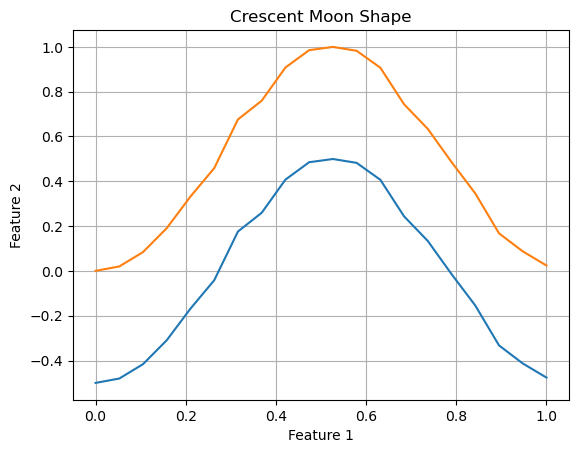

In [103]:
#Нагенерим одну фичу
x1_values = np.linspace(0, 1, 20) #+ np.random.uniform(-0.1,0.1, 20)
x2_values = np.linspace(0, 1, 20) #+ np.random.uniform(-0.1,0.1, 20)


# Нагенерим классы
crescent_y1 = 0.5 * np.cos(x_values + np.pi) 
crescent_y2 = 0.5 * np.cos(x_values + np.pi) + 0.5


# Plot the crescent moon
plt.plot(x1_values, crescent_y1)
plt.plot(x1_values, crescent_y2)
plt.title('Crescent Moon Shape')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [20]:
target1 = np.linspace(1, 1, 20)
target0 = np.linspace(0, 0, 20)
target = np.append(target0, target1)

In [21]:
data = np.array([np.append(x1_values,x2_values),np.append(crescent_y1,crescent_y2), target]).T

In [22]:
clf = DecisionTreeClassifier(random_state=0, max_depth=1)
clf.fit(data[:,0:2], data[:,2])

[Text(0.5, 0.75, 'x[1] <= -0.007\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]')]

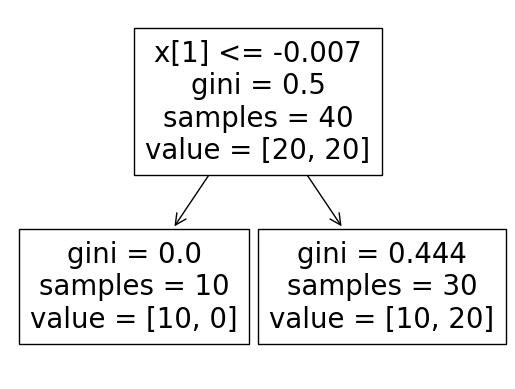

In [52]:
plot_tree(clf)

/var/folders/ql/vrw7qj591qg87tf0zk1w138rygg3hy/T/ipykernel_54972/3257406597.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


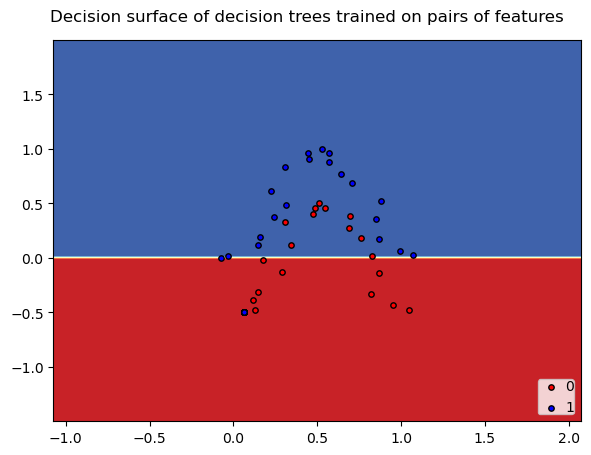

In [54]:
plot_surface(clf)

In [62]:
clf3 = DecisionTreeClassifier(random_state=0, max_depth=3)

In [63]:
clf3.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.4, 0.875, 'x[1] <= -0.007\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6, 0.625, 'x[1] <= 0.509\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4, 0.375, 'x[0] <= 0.274\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

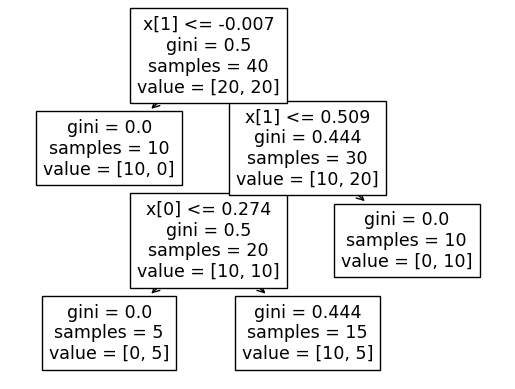

In [64]:
plot_tree(clf3)

/var/folders/ql/vrw7qj591qg87tf0zk1w138rygg3hy/T/ipykernel_54972/371747553.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


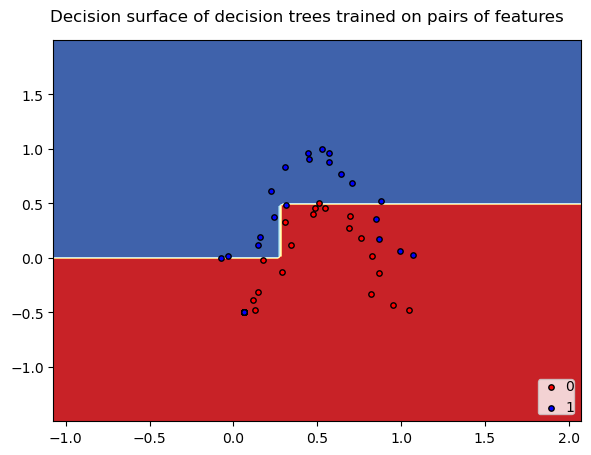

In [65]:
plot_surface(clf3)

In [66]:
clf_res = DecisionTreeClassifier(random_state=0, max_depth=10)
clf_res.fit(data[:,0:2], data[:,2])

Text(0.8333333333333334, 0.6428571428571429, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')

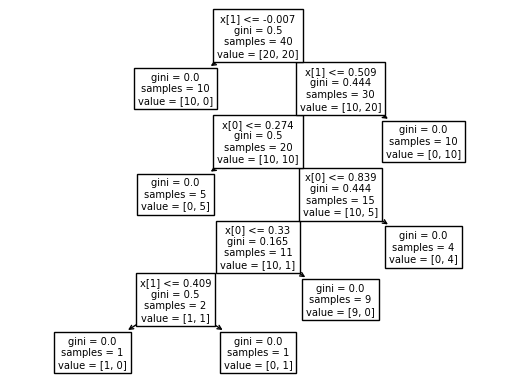

In [75]:
plot_tree(clf_res)[-1]

/var/folders/ql/vrw7qj591qg87tf0zk1w138rygg3hy/T/ipykernel_54972/371747553.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


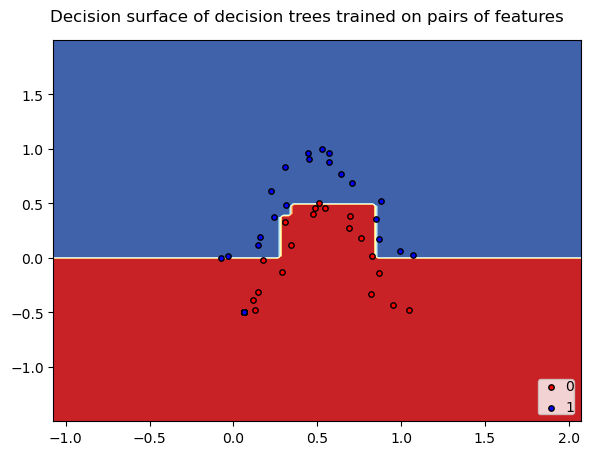

In [69]:
plot_surface(clf_res)

In [76]:
clf_res_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion='entropy')
clf_res_entropy.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

Text(0.8333333333333334, 0.6428571428571429, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]')

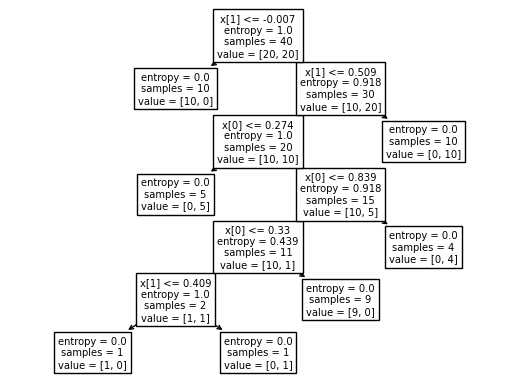

In [77]:
plot_tree(clf_res_entropy)[-1]

/var/folders/ql/vrw7qj591qg87tf0zk1w138rygg3hy/T/ipykernel_54972/371747553.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


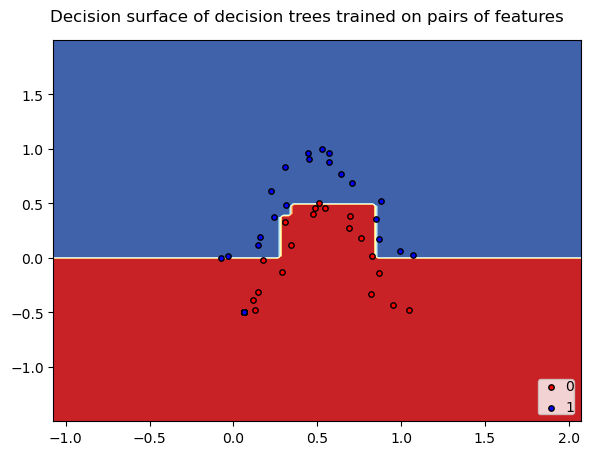

In [73]:
plot_surface(clf_res_entropy)

In [80]:
from sklearn.ensemble import RandomForestClassifier

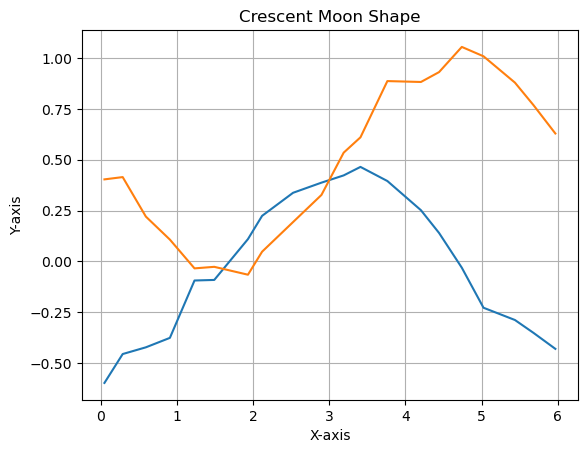

In [84]:
x_values = np.linspace(0, 6, 20) + np.random.uniform(-0.1,0.1, 20)

crescent_y1 = 0.5 * np.cos(x_values + np.pi) + np.random.uniform(-0.1,0.1, 20)
crescent_y2 = 0.5 * np.sin(x_values + np.pi) + 0.5 + np.random.uniform(-0.1,0.1, 20)

plt.plot(x_values, crescent_y1)
plt.plot(x_values, crescent_y2)
plt.title('Crescent Moon Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [20]:
target1 = np.linspace(1, 1, 20)
target0 = np.linspace(0, 0, 20)
target = np.append(target0, target1)

In [85]:
data = np.array([np.append(x_values,x_values),np.append(crescent_y1,crescent_y2), target]).T

In [86]:
clf_1 = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_1.fit(data[:,0:2], data[:,2])

DecisionTreeClassifier(max_depth=10, random_state=0)

/var/folders/ql/vrw7qj591qg87tf0zk1w138rygg3hy/T/ipykernel_54972/1745985477.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


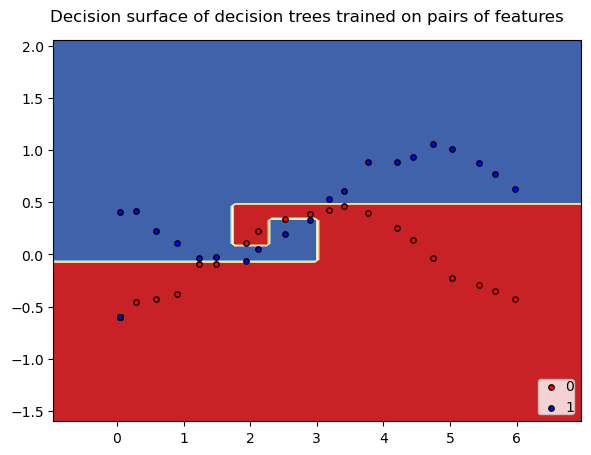

In [88]:
plot_surface(clf_1, data)

In [91]:
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(data[:,0:2], data[:,2])

RandomForestClassifier(max_depth=10, random_state=0)

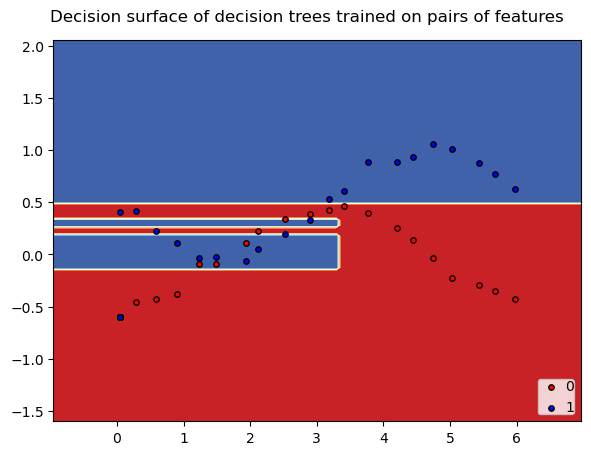

In [99]:
plot_surface(rf.estimators_[1], data)

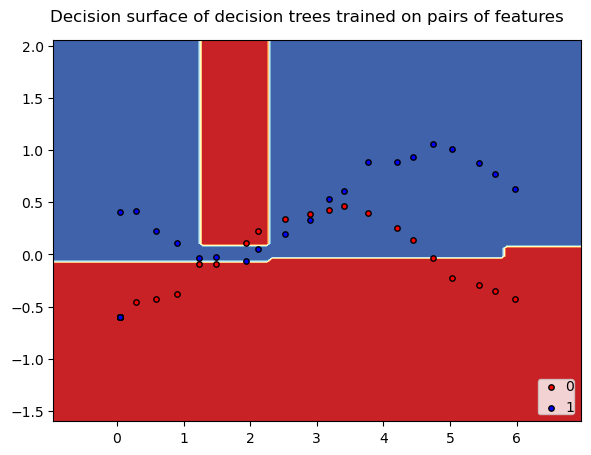

In [100]:
plot_surface(rf.estimators_[3], data)

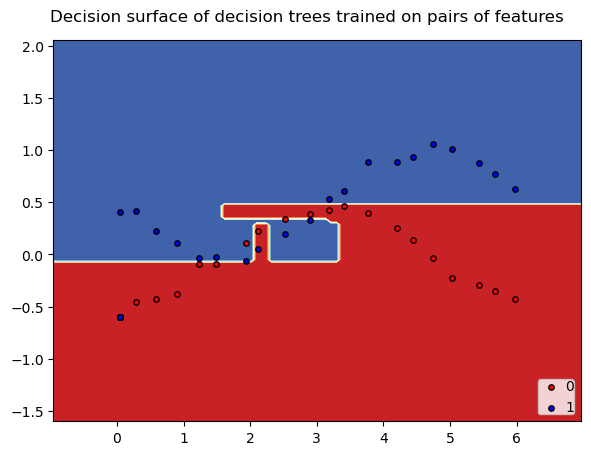

In [101]:
plot_surface(rf.estimators_[6], data)

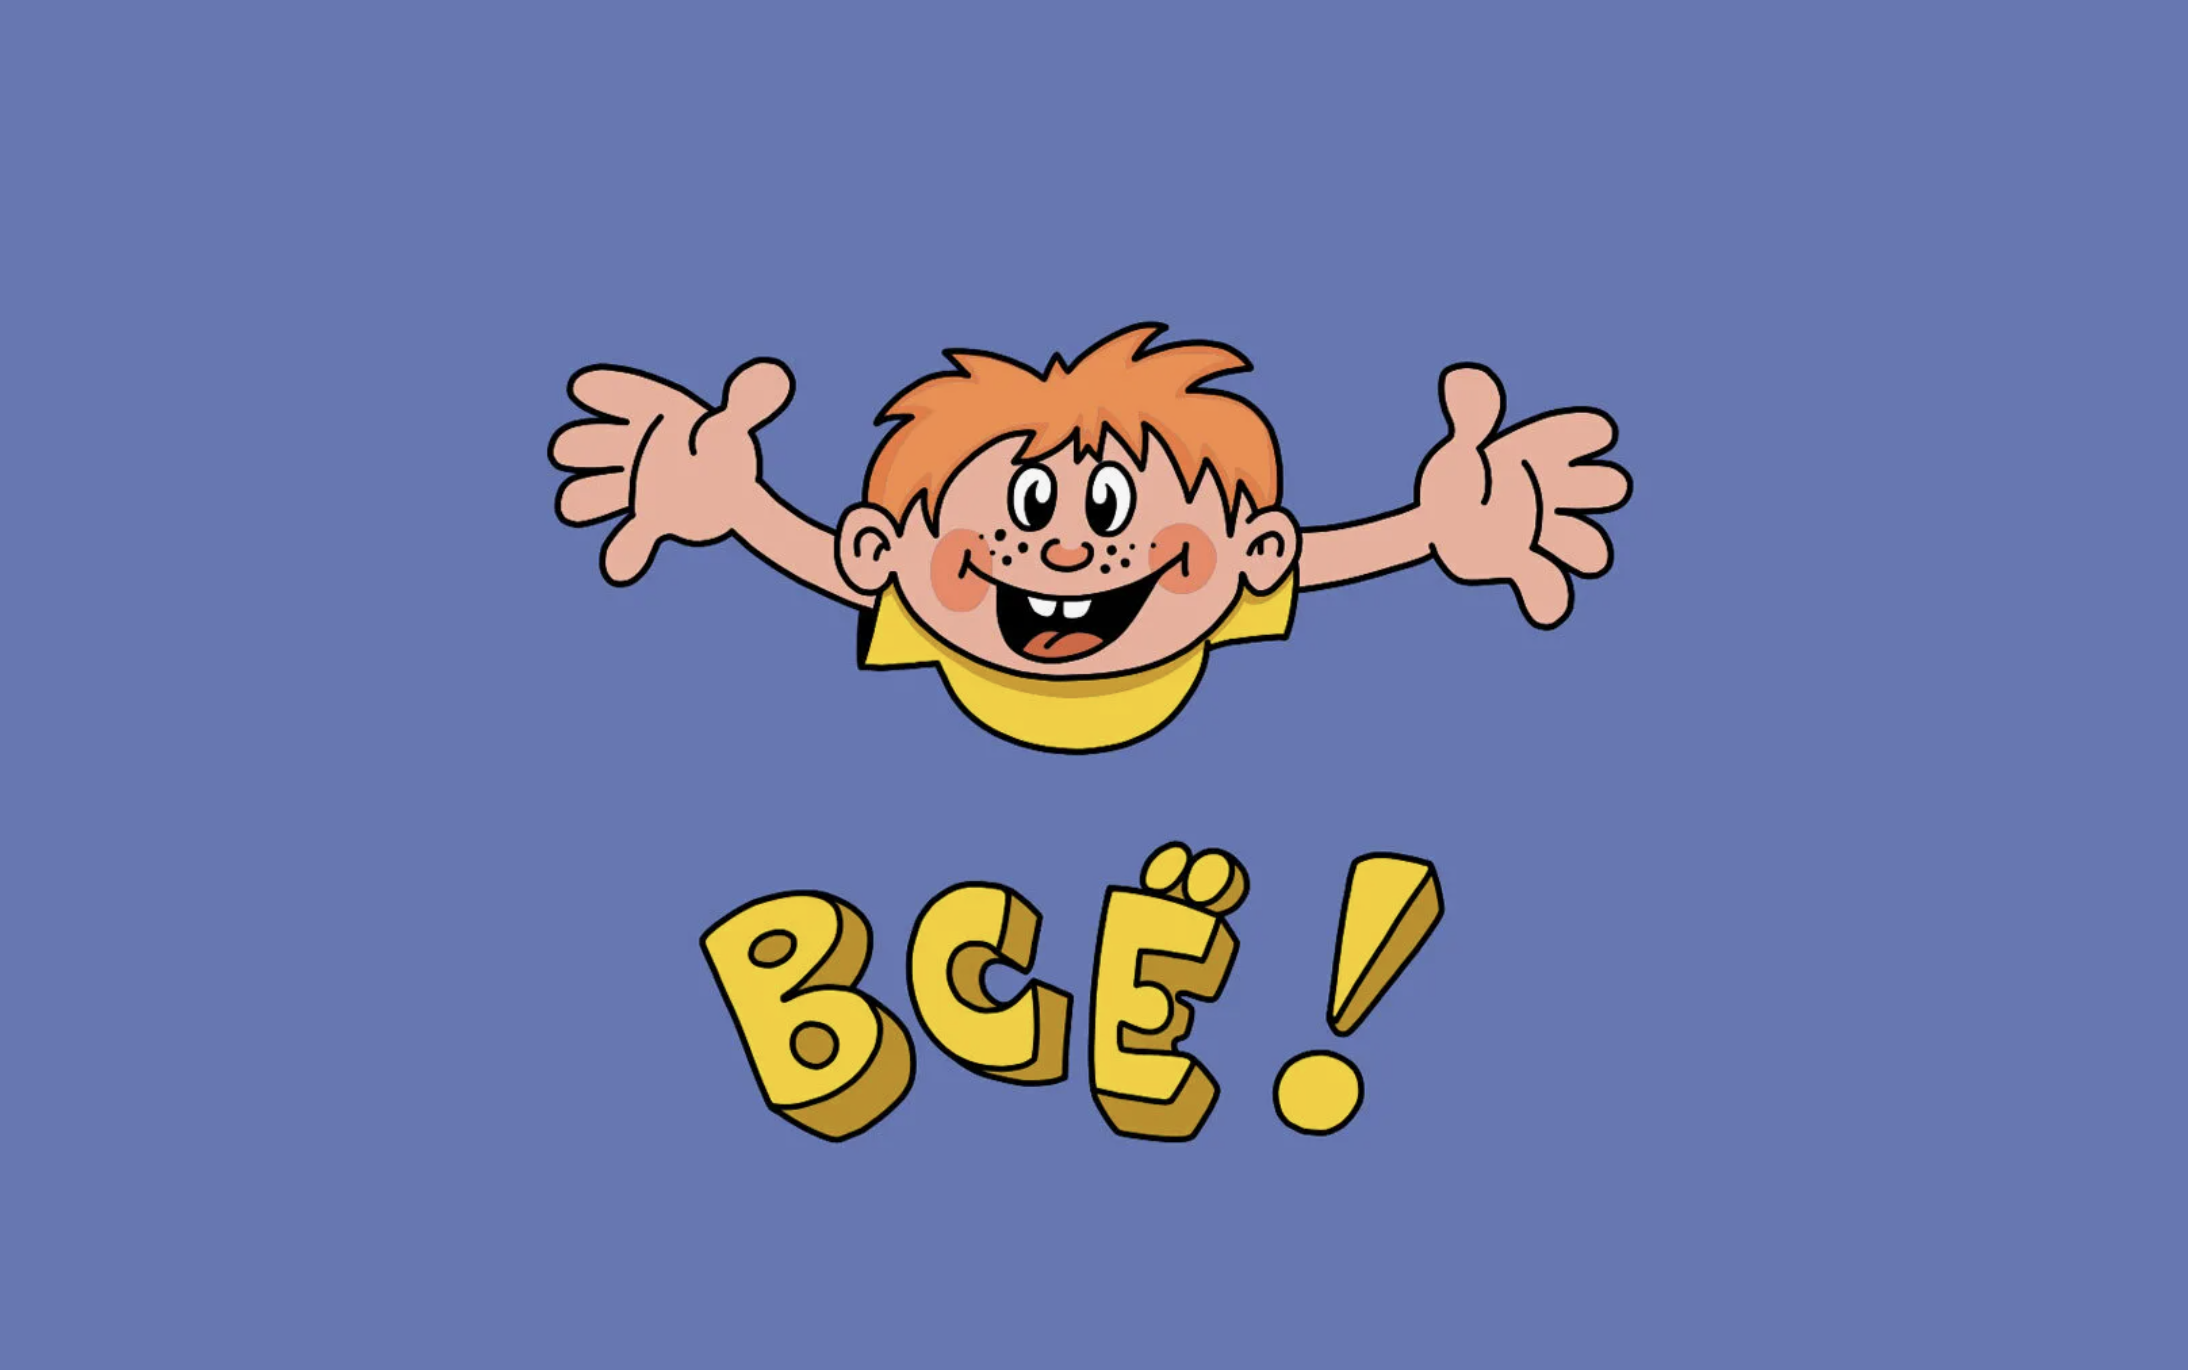

In [105]:
Image(filename = "pics/все.png", width=1000, height=1000)

текст, который я написал и прочитал:
## Решающие деревья - введение

Решающие деревья - это семейство нелинейных методов машинного обучения, основанных на построении простых решающих правил <br>

Первые алгоритмы появились во второй половине 20-ого века, в 1970–1990-e годы интерес к ним был весьма велик как в индустрии, где был полезен хорошо интерпретируемый классификатор, так и в науке, где учёные интересовались способами приближённого решения NP-полных задач (что это такое я рассказывать не буду).

В связи с этим сложилось много хорошо работающих наборов эвристик, у которых даже были имена: например, ID3 был первой реализацией дерева, минимизирующего энтропию, а CART (Classification and Regression Trees) — первым деревом для регрессии. Некоторые из них были запатентованы и распространялись коммерчески. Но сейчас это все стало бесполезным, так как люди за 40 лет научились научились реализовывать различные сочетания таких алгоритмов путем настройки их через гиперпараметры, ну и тому подобным вещам, о которых я сейчас и буду рассказывать 

### Как выглядит дерево и из чего оно состоит

Терминальная вершина - это самая первая вершина, с которой начинается как построение дерева, так и отнесение обьекта к какому то классу в процессе применения алгоритма, в случае решения задачи классификации, или к присваиванию какого то вещественного значения, в случае решения задачи регрессии. Да, с помощью деревьев решений можно решать обе эти задачи

Предикат - это значение, 
Внутренняя вершина, или по другому, ветвление

Дуга - или значение предиката (предикат True - идем вправо, False - идем влево)

Лист - записанное предсказание метки класса или вещественного значения

Ниже видим пример продвинутой модели кредитного скоринга, которая решает, давать ли клиенту кредит, мы смотрим на зарплату клиента, сравниваем с установленным порогом, потом смотрим на кол-во просрочек и принимаем решение

### Как выгдядит предкат

Для вещественного признака предикат - это сравнение с некоторым вещественным порогом

Для категориального признака - это принадлежность к какой то константе, какому то значению среди значений признака

### Как происходит построение этого предиката (расчет порога для сплита)?
Процесс называется расщепление на области/регионы. Предикат, о котором я говорил, разделяет признак по какому то значению, это можно увидеть на картинках ниже.

### Как выбрать порог расщепления?

При выборе значения предиката, мы хотим добиться некого наилучшего разделения, чтобы в одну ветку попало как можно больше меток одного класса, а в другую второго класса. Как пример, можно взглянуть на картинку ниже, которая иллюстрирует это. Мы видим, "хорошее" разделение и "плохое разделение"

Решением этой задачи является введение так называемой меры неоднородности, или по другому impurity

Q - это функция, зависящая от заданного параметра меток классов R и порога разбиения тетта
Для этого мы рассчитываем некую функцию H(R), рассчитываем ее слева и справа, домножаем на некий "поправочный" коэффициент - отношение кол-ва элементов в определенной части к кол-ву всех. Это оберегает нас от разделения по самому "крайнему" значению

Какие бывают функции расчета неоднородности

Джини

Энтропия

Missclassification criteria 

#### Энтропийный критерий можно теоретически обосновать с помощью Information Gain, теорию информации и другими математическими штуками
Но говорить мы об этом сегодня не будем

### Расщепление в задачах регресии делается по дисперсии


### Проблема переобучения деревьев

Глубокие деревья склонны к переобучению,
поскольку «затачиваются» на отдельные объекты

1. Прекращают построение достаточно рано
(см. критерии останова, stopping early)

можно на отложенной выборке выбрать точку останова

2. Подрезают деревья (post-pruning)

3. Используют в ансамблях (например, в случайном лесе)


### Итог: решающие деревья

возможности

*  способны обучиться на любой (непротиворечивой) выборке
(при возможности построения неограниченного дерева)
* можно использовать при признаках разных типов (+ пропуски)

* можно сделать устойчивыми к выбросам

* универсальный метод – для всех типов задач машинного обучения

* встроенный отбор признаков

* нелинейный метод!

##### качество

* не очень высокое качество решения задачи / переобучение

* хороши в ансамблях, об этом позже расскажу

##### эффективность / стабильность

* достаточно быстро строятся

* нет ограничений на распределения признаков

* «неустойчивый алгоритм» ( меняется при небольшом изменении выборки)

* плох для больших / изменяющихся данных

##### понимание, интерпретация и анализ

* просто объяснить неспециалисту

* ближе к человеческой логики принятия решения

* можно изобразить (на слайде)

* нет красивой аналитической формулы для модели


#### Ансамбль в общем виде - это обьединение какого-то кол-ва "базовых" моделей и использование их ответов для построения результата
Существует много разных способов как строить эти алгоритмы, так и рассчитывать результат, вот примеры

1. Комитеты (госовование), усреднение
2. Бэгинг
3. Блендинг
4. Стекинг
5. И так далее, их еще довольно много


#### Как может выглядеть усложнение(улучшение)? 
Путем использования "мета-алгоритма", который также можно тюнить

#### Это можно теоретически обосновать
Примем, что алгоритмы независимые и посмотрим, как будет выглядеть дисперсия и мат ожидание



Как видим - мат ожидание ансабля - это мат ожидание одного алогритма (по св-ву мат ожидания), а дисперсия уменьшается на кол-во базовых алгоритмов 
Но в реальном мире такого не происходит - как минимум алгоритмы строятся на одной и той же выборке, решают одну задачу и настраиваются на один и тот же целевой вектор, поэтому мы получаем зависимые результаты

Чтобы прилизиться к ситуации с "независимостью", мы можем следовать следующим практикам:
Делать алгоритмы разнообразными (стекинг, деревья с разной глубиной), строить их на разных подвыборках (бэгинг, бусстреп)

Так вот алгоритм случайного леса основан на совмещении двух подходов - бэгинг + специальное построение деревьев

Его придумал Лео Блейман в 1990-м году и он до сих пор очень активно используется в индустрии, так как показывается очень хорошее качетсво, ~75% задач всего машинного обучения можно просто решить этим способом и получить дешевое решение с приемлемым качеством

#### Построение случайного леса
1. Строится подвыборка (с повторением)
2. На ней строится обычное решающее дерево, с учетом всех параметов (кол-во фичей, глубина и тд)
3. Пункты 1 и 2 повторяются до достижения n_estimators/критерий остановки и тд и тп
4. Строим ответ

Полезные темы, с коротыми еще можно ознакомится:
1. Измерение качества с помощью OOB - это та часть каждой подвыборки, оставшаяся после ее формирования
2. Рейтинг признаков
3. Другие виды ансамблирования
4. Многоклассовая классификация (1vs1, 1vsall)
5. Бустинг (усиление каждого нового алгоритма через минимизацию ошибки предыдущего)

